## Data Recommendations

* movie_budgets is superior to movie_gross

#### Questions

1. Talent-driven approach to successful filmmaking. First, identify which talent are creating profitable and highly-discussed films.
* Locate actors, writers, directors, and producers that produce a high average profit in their projects.
* Create short list of most successful talent.
2. What does a successful movie look like? Runtime, genre?
* Find correlation between runtime and genre with profit. 
* Are there genres that the chosen talent prefer?
3. What should the budget be?
* How much is budget correlated with profit?

In [1]:
import pandas as pd
import sqlite3

## Movie_Gross

In [2]:
pd.read_csv("../Data/bom.movie_gross.csv.gz")

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


## IMDB SQL

In [3]:
con = sqlite3.connect('../Data/im.db/im.db')
cursor=con.cursor()

In [4]:
con = sqlite3.connect('../Data/im.db/im.db')
cursor = con.cursor()
imdb_schema_df = pd.read_sql('''
SELECT 
    *
FROM
    sqlite_master
''', con)

imdb_schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## Base Query

In [5]:
master_sql = pd.read_sql('''
SELECT primary_title, start_year, runtime_minutes, genres, averagerating, primary_name, category
FROM principals
JOIN persons
    USING(person_id)
JOIN movie_basics
    USING(movie_id)
JOIN movie_ratings
    USING(movie_id)
WHERE start_year > 2011
AND numvotes > 1000
''', con)

master_sql

,primary_title,start_year,runtime_minutes,genres,averagerating,primary_name,category
0,The Other Side of the Wind,2018,122.0,Drama,6.9,Orson Welles,director
1,The Other Side of the Wind,2018,122.0,Drama,6.9,Peter Bogdanovich,actor
2,The Other Side of the Wind,2018,122.0,Drama,6.9,John Huston,actor
3,The Other Side of the Wind,2018,122.0,Drama,6.9,Susan Strasberg,actress
4,The Other Side of the Wind,2018,122.0,Drama,6.9,Gary Graver,cinematographer
...,...,...,...,...,...,...,...
75590,The Hard Way,2019,92.0,Action,4.7,Michael Jai White,actor
75591,The Hard Way,2019,92.0,Action,4.7,Thomas J. Churchill,writer
75592,The Hard Way,2019,92.0,Action,4.7,Randy Couture,actor
75593,The Hard Way,2019,92.0,Action,4.7,Madalina Anea,actress


In [6]:
master_sql['primary_name'].value_counts().head(20)


Jason Blum              61
Mercedes Gamero         30
James Franco            29
David Michael Latt      29
Necati Akpinar          28
Tim Bevan               27
Bhushan Kumar           26
Randall Emmett          26
Nicolas Cage            25
Anurag Kashyap          25
Akshay Kumar            25
Eric Fellner            25
Gopi Sundar             24
Karan Johar             24
Samantha Ruth Prabhu    24
Peter Safran            23
John Cusack             23
Siddharth Roy Kapur     23
Alexandre Desplat       23
Danny Bensi             22
Name: primary_name, dtype: int64

## Movie Info

In [7]:
pd.read_csv('../Data/rt.movie_info.tsv.gz', sep='\t')


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


## Rotten Tomato Reviews

In [8]:
pd.read_csv('../Data/rt.reviews.tsv.gz', delimiter="\t", encoding = 'unicode_escape')


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


## The Movie Database

In [9]:
pd.read_csv('../Data/tmdb.movies.csv.gz')


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


## Budget Info

In [10]:
budget_info = pd.read_csv('../Data/tn.movie_budgets.csv.gz')
budget_info

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## Merging SQL and Budget

In [11]:
relevant_budget_info = budget_info.copy()
relevant_budget_info.rename(columns = {'movie':'primary_title'}, inplace = True)
relevant_budget_info = relevant_budget_info[['primary_title', 'production_budget','domestic_gross', 'worldwide_gross']]
relevant_budget_info

,primary_title,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...
5777,Red 11,"$7,000",$0,$0
5778,Following,"$6,000","$48,482","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,A Plague So Pleasant,"$1,400",$0,$0


In [12]:
joined_df = pd.merge(master_sql, relevant_budget_info, on=['primary_title'])
joined_df['primary_title'].value_counts()

The Square               40
The Gambler              40
Life                     40
Legend                   40
Beauty and the Beast     40
                         ..
Inside Llewyn Davis       9
Under the Rainbow         8
Crowsnest                 8
Indie Game: The Movie     7
Hawaii                    7
Name: primary_title, Length: 1269, dtype: int64

In [13]:
joined_df

,primary_title,start_year,runtime_minutes,genres,averagerating,primary_name,category,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Charlie Sheen,actor,"$45,000,000",$0,"$73,706"
1,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Sean Catherine Derek,writer,"$45,000,000",$0,"$73,706"
2,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Haylie Duff,actress,"$45,000,000",$0,"$73,706"
3,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Hilary Duff,actress,"$45,000,000",$0,"$73,706"
4,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Robert Engelman,producer,"$45,000,000",$0,"$73,706"
...,...,...,...,...,...,...,...,...,...,...
13428,Unplanned,2019,106.0,"Biography,Drama",6.3,Chris Jones,producer,"$6,000,000","$18,107,621","$18,107,621"
13429,Unplanned,2019,106.0,"Biography,Drama",6.3,Ashley Bratcher,actress,"$6,000,000","$18,107,621","$18,107,621"
13430,Unplanned,2019,106.0,"Biography,Drama",6.3,Jared Lotz,actor,"$6,000,000","$18,107,621","$18,107,621"
13431,Unplanned,2019,106.0,"Biography,Drama",6.3,Brooks Ryan,actor,"$6,000,000","$18,107,621","$18,107,621"


In [14]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13433 entries, 0 to 13432
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      13433 non-null  object 
 1   start_year         13433 non-null  int64  
 2   runtime_minutes    13433 non-null  float64
 3   genres             13433 non-null  object 
 4   averagerating      13433 non-null  float64
 5   primary_name       13433 non-null  object 
 6   category           13433 non-null  object 
 7   production_budget  13433 non-null  object 
 8   domestic_gross     13433 non-null  object 
 9   worldwide_gross    13433 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


## Remove commas and dollar signs

In [15]:
joined_df['production_budget'] = joined_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
joined_df['worldwide_gross'] = joined_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)
joined_df['domestic_gross'] = joined_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)

joined_df

,primary_title,start_year,runtime_minutes,genres,averagerating,primary_name,category,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Charlie Sheen,actor,45000000,0,73706
1,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Sean Catherine Derek,writer,45000000,0,73706
2,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Haylie Duff,actress,45000000,0,73706
3,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Hilary Duff,actress,45000000,0,73706
4,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Robert Engelman,producer,45000000,0,73706
...,...,...,...,...,...,...,...,...,...,...
13428,Unplanned,2019,106.0,"Biography,Drama",6.3,Chris Jones,producer,6000000,18107621,18107621
13429,Unplanned,2019,106.0,"Biography,Drama",6.3,Ashley Bratcher,actress,6000000,18107621,18107621
13430,Unplanned,2019,106.0,"Biography,Drama",6.3,Jared Lotz,actor,6000000,18107621,18107621
13431,Unplanned,2019,106.0,"Biography,Drama",6.3,Brooks Ryan,actor,6000000,18107621,18107621


## Create profit column

In [16]:
joined_df['profit'] = joined_df['worldwide_gross'] - joined_df['production_budget']
joined_df

,primary_title,start_year,runtime_minutes,genres,averagerating,primary_name,category,production_budget,domestic_gross,worldwide_gross,profit
0,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Charlie Sheen,actor,45000000,0,73706,-44926294
1,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Sean Catherine Derek,writer,45000000,0,73706,-44926294
2,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Haylie Duff,actress,45000000,0,73706,-44926294
3,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Hilary Duff,actress,45000000,0,73706,-44926294
4,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,Robert Engelman,producer,45000000,0,73706,-44926294
...,...,...,...,...,...,...,...,...,...,...,...
13428,Unplanned,2019,106.0,"Biography,Drama",6.3,Chris Jones,producer,6000000,18107621,18107621,12107621
13429,Unplanned,2019,106.0,"Biography,Drama",6.3,Ashley Bratcher,actress,6000000,18107621,18107621,12107621
13430,Unplanned,2019,106.0,"Biography,Drama",6.3,Jared Lotz,actor,6000000,18107621,18107621,12107621
13431,Unplanned,2019,106.0,"Biography,Drama",6.3,Brooks Ryan,actor,6000000,18107621,18107621,12107621


## Finding average profit sorted by talent

In [17]:
joined_df2 = joined_df.sort_values(by='profit', ascending=False)

In [18]:
joined_df2

,primary_title,start_year,runtime_minutes,genres,averagerating,primary_name,category,production_budget,domestic_gross,worldwide_gross,profit
11204,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,Stephen McFeely,writer,300000000,678815482,2048134200,1748134200
11200,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,Anthony Russo,director,300000000,678815482,2048134200,1748134200
11195,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,Robert Downey Jr.,actor,300000000,678815482,2048134200,1748134200
11196,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,Chris Evans,actor,300000000,678815482,2048134200,1748134200
11197,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,Jack Kirby,writer,300000000,678815482,2048134200,1748134200
...,...,...,...,...,...,...,...,...,...,...,...
13056,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,Stan Lee,writer,350000000,42762350,149762350,-200237650
13057,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,James McAvoy,actor,350000000,42762350,149762350,-200237650
13058,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,Michael Fassbender,actor,350000000,42762350,149762350,-200237650
13059,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,Chris Claremont,writer,350000000,42762350,149762350,-200237650


In [19]:
joined_df3 = joined_df2.drop(['category', 'primary_name'], axis = 1)
joined_df3.drop_duplicates(inplace=True)

In [20]:
joined_df3['profit over budget'] = joined_df3['profit'] / joined_df3['production_budget']
joined_df3.sort_values(by='profit over budget', ascending=False, inplace=True)

In [21]:
joined_df3

,primary_title,start_year,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross,profit,profit over budget
6910,The Gallows,2015,81.0,"Horror,Mystery,Thriller",4.2,100000,22764410,41656474,41556474,415.564740
2311,Halloween,2018,106.0,"Horror,Thriller",6.6,325000,47000000,70000000,69675000,214.384615
2543,The Devil Inside,2012,83.0,Horror,4.2,1000000,53262945,101759490,100759490,100.759490
11294,The Birth of a Nation,2016,120.0,"Biography,Drama,History",6.4,110000,10000000,11000000,10890000,99.000000
3211,Cinderella,2015,105.0,"Drama,Family,Fantasy",6.9,2900000,85000000,263591415,260691415,89.893591
...,...,...,...,...,...,...,...,...,...,...
4885,The Wicked Within,2015,84.0,Horror,4.5,1200000,0,0,-1200000,-1.000000
6257,Crowsnest,2012,84.0,"Horror,Mystery,Thriller",3.9,1200000,0,0,-1200000,-1.000000
4276,Airborne,2012,81.0,"Comedy,Crime,Horror",3.9,1200000,0,0,-1200000,-1.000000
569,Freaky Deaky,2012,90.0,"Comedy,Crime,Thriller",6.1,6000000,0,0,-6000000,-1.000000


In [22]:
joined_df3 = joined_df3.loc[(joined_df3['domestic_gross'] != 0) & (joined_df3['worldwide_gross'] != 0)]


In [23]:
joined_df3.loc[:,'production_budget'] = joined_df3.iloc[:,5]/1000000
joined_df3.loc[:,'domestic_gross'] = joined_df3.iloc[:,6]/1000000
joined_df3.loc[:,'worldwide_gross'] = joined_df3.iloc[:,7]/1000000
joined_df3.loc[:,'profit'] = joined_df3.iloc[:,8]/1000000


C:\Users\milad\Documents\Flatiron\Anaconda\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [24]:
joined_df3

,primary_title,start_year,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross,profit,profit over budget
6910,The Gallows,2015,81.0,"Horror,Mystery,Thriller",4.2,0.100,22.764410,41.656474,41.556474,415.564740
2311,Halloween,2018,106.0,"Horror,Thriller",6.6,0.325,47.000000,70.000000,69.675000,214.384615
2543,The Devil Inside,2012,83.0,Horror,4.2,1.000,53.262945,101.759490,100.759490,100.759490
11294,The Birth of a Nation,2016,120.0,"Biography,Drama,History",6.4,0.110,10.000000,11.000000,10.890000,99.000000
3211,Cinderella,2015,105.0,"Drama,Family,Fantasy",6.9,2.900,85.000000,263.591415,260.691415,89.893591
...,...,...,...,...,...,...,...,...,...,...
9991,10 Days in a Madhouse,2015,111.0,Drama,6.7,12.000,0.014616,0.014616,-11.985384,-0.998782
2207,Eddie: The Sleepwalking Cannibal,2012,90.0,"Comedy,Horror",5.6,1.400,0.001632,0.001632,-1.398368,-0.998834
4383,Inescapable,2012,93.0,"Action,Drama,Mystery",5.2,4.000,0.004327,0.004327,-3.995673,-0.998918
8943,Higher Power,2018,93.0,"Action,Sci-Fi,Thriller",5.3,0.500,0.000528,0.000528,-0.499472,-0.998944


In [61]:
joined_df5= joined_df3.reset_index()

In [25]:
comedy_movies = joined_df3.loc[joined_df3['genres'].str.contains('Comedy')]
comedy_movies

,primary_title,start_year,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross,profit,profit over budget
6426,Home,2015,94.0,"Adventure,Animation,Comedy",6.6,0.5,0.015433,44.793168,44.293168,88.586336
4704,Magic Mike,2012,110.0,"Comedy,Drama",6.1,7.0,113.721571,170.549753,163.549753,23.364250
6559,A Haunted House,2013,86.0,"Comedy,Fantasy",5.1,2.5,40.041683,59.922558,57.422558,22.969023
11102,Billy Elliot,2014,169.0,"Comedy,Drama,Music",8.5,5.0,21.995263,109.253745,104.253745,20.850749
10687,La La Land,2016,128.0,"Comedy,Drama,Music",8.0,20.0,151.101803,426.351163,406.351163,20.317558
...,...,...,...,...,...,...,...,...,...,...
2496,Vamps,2012,92.0,"Comedy,Horror,Romance",5.2,16.0,0.003361,0.094812,-15.905188,-0.994074
8912,R100,2013,99.0,"Comedy,Drama",6.1,5.5,0.024956,0.024956,-5.475044,-0.995463
4504,Detention of the Dead,2012,87.0,"Action,Adventure,Comedy",4.6,0.5,0.001778,0.001778,-0.498222,-0.996444
4199,Freaks of Nature,2015,92.0,"Comedy,Horror,Sci-Fi",5.9,33.0,0.070958,0.070958,-32.929042,-0.997850


In [26]:
comedy_movies['profit over budget'].mean().round(decimals=2)

2.8

In [27]:
drama_movies = joined_df3.loc[joined_df3['genres'].str.contains('Drama')]
drama_movies

,primary_title,start_year,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross,profit,profit over budget
11294,The Birth of a Nation,2016,120.0,"Biography,Drama,History",6.4,0.11,10.000000,11.000000,10.890000,99.000000
3211,Cinderella,2015,105.0,"Drama,Family,Fantasy",6.9,2.90,85.000000,263.591415,260.691415,89.893591
4103,Benji,2018,87.0,"Crime,Drama,Family",6.4,0.50,31.559560,31.559560,31.059560,62.119120
12174,Moonlight,2016,111.0,Drama,7.4,1.50,27.854931,65.245512,63.745512,42.497008
12280,Dangal,2016,161.0,"Action,Biography,Drama",8.5,9.50,12.391761,294.654618,285.154618,30.016276
...,...,...,...,...,...,...,...,...,...,...
8655,United Passions,2014,110.0,"Drama,History,Sport",2.1,30.00,0.000918,0.168832,-29.831168,-0.994372
9362,Circle,2015,87.0,"Drama,Mystery,Sci-Fi",6.0,2.00,0.010024,0.010024,-1.989976,-0.994988
8912,R100,2013,99.0,"Comedy,Drama",6.1,5.50,0.024956,0.024956,-5.475044,-0.995463
9991,10 Days in a Madhouse,2015,111.0,Drama,6.7,12.00,0.014616,0.014616,-11.985384,-0.998782


In [28]:
drama_movies['profit over budget'].mean().round(decimals=2)

2.69

In [57]:

joined_df4= joined_df3['genres'].str.split(',', expand=True).reset_index()


In [58]:
joined_df4

,index,0,1,2
0,6910,Horror,Mystery,Thriller
1,2311,Horror,Thriller,None
2,2543,Horror,None,None
3,11294,Biography,Drama,History
4,3211,Drama,Family,Fantasy
...,...,...,...,...
1213,9991,Drama,None,None
1214,2207,Comedy,Horror,None
1215,4383,Action,Drama,Mystery
1216,8943,Action,Sci-Fi,Thriller


In [62]:
joined_df5

,index,primary_title,start_year,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross,profit,profit over budget
0,6910,The Gallows,2015,81.0,"Horror,Mystery,Thriller",4.2,0.100,22.764410,41.656474,41.556474,415.564740
1,2311,Halloween,2018,106.0,"Horror,Thriller",6.6,0.325,47.000000,70.000000,69.675000,214.384615
2,2543,The Devil Inside,2012,83.0,Horror,4.2,1.000,53.262945,101.759490,100.759490,100.759490
3,11294,The Birth of a Nation,2016,120.0,"Biography,Drama,History",6.4,0.110,10.000000,11.000000,10.890000,99.000000
4,3211,Cinderella,2015,105.0,"Drama,Family,Fantasy",6.9,2.900,85.000000,263.591415,260.691415,89.893591
...,...,...,...,...,...,...,...,...,...,...,...
1213,9991,10 Days in a Madhouse,2015,111.0,Drama,6.7,12.000,0.014616,0.014616,-11.985384,-0.998782
1214,2207,Eddie: The Sleepwalking Cannibal,2012,90.0,"Comedy,Horror",5.6,1.400,0.001632,0.001632,-1.398368,-0.998834
1215,4383,Inescapable,2012,93.0,"Action,Drama,Mystery",5.2,4.000,0.004327,0.004327,-3.995673,-0.998918
1216,8943,Higher Power,2018,93.0,"Action,Sci-Fi,Thriller",5.3,0.500,0.000528,0.000528,-0.499472,-0.998944


In [64]:
df5 = joined_df5.merge(joined_df4, on='index')
df5

,index,primary_title,start_year,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross,profit,profit over budget,0,1,2
0,6910,The Gallows,2015,81.0,"Horror,Mystery,Thriller",4.2,0.100,22.764410,41.656474,41.556474,415.564740,Horror,Mystery,Thriller
1,2311,Halloween,2018,106.0,"Horror,Thriller",6.6,0.325,47.000000,70.000000,69.675000,214.384615,Horror,Thriller,None
2,2543,The Devil Inside,2012,83.0,Horror,4.2,1.000,53.262945,101.759490,100.759490,100.759490,Horror,None,None
3,11294,The Birth of a Nation,2016,120.0,"Biography,Drama,History",6.4,0.110,10.000000,11.000000,10.890000,99.000000,Biography,Drama,History
4,3211,Cinderella,2015,105.0,"Drama,Family,Fantasy",6.9,2.900,85.000000,263.591415,260.691415,89.893591,Drama,Family,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,9991,10 Days in a Madhouse,2015,111.0,Drama,6.7,12.000,0.014616,0.014616,-11.985384,-0.998782,Drama,None,None
1214,2207,Eddie: The Sleepwalking Cannibal,2012,90.0,"Comedy,Horror",5.6,1.400,0.001632,0.001632,-1.398368,-0.998834,Comedy,Horror,None
1215,4383,Inescapable,2012,93.0,"Action,Drama,Mystery",5.2,4.000,0.004327,0.004327,-3.995673,-0.998918,Action,Drama,Mystery
1216,8943,Higher Power,2018,93.0,"Action,Sci-Fi,Thriller",5.3,0.500,0.000528,0.000528,-0.499472,-0.998944,Action,Sci-Fi,Thriller


In [69]:
df5.rename(columns = {0:'genres 1', 1:'genres 2', 2: 'genres 3'}, inplace=True)
df5

,index,primary_title,start_year,runtime_minutes,genres,averagerating,production_budget,domestic_gross,worldwide_gross,profit,profit over budget,genres 1,genres 2,genres 3
0,6910,The Gallows,2015,81.0,"Horror,Mystery,Thriller",4.2,0.100,22.764410,41.656474,41.556474,415.564740,Horror,Mystery,Thriller
1,2311,Halloween,2018,106.0,"Horror,Thriller",6.6,0.325,47.000000,70.000000,69.675000,214.384615,Horror,Thriller,None
2,2543,The Devil Inside,2012,83.0,Horror,4.2,1.000,53.262945,101.759490,100.759490,100.759490,Horror,None,None
3,11294,The Birth of a Nation,2016,120.0,"Biography,Drama,History",6.4,0.110,10.000000,11.000000,10.890000,99.000000,Biography,Drama,History
4,3211,Cinderella,2015,105.0,"Drama,Family,Fantasy",6.9,2.900,85.000000,263.591415,260.691415,89.893591,Drama,Family,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,9991,10 Days in a Madhouse,2015,111.0,Drama,6.7,12.000,0.014616,0.014616,-11.985384,-0.998782,Drama,None,None
1214,2207,Eddie: The Sleepwalking Cannibal,2012,90.0,"Comedy,Horror",5.6,1.400,0.001632,0.001632,-1.398368,-0.998834,Comedy,Horror,None
1215,4383,Inescapable,2012,93.0,"Action,Drama,Mystery",5.2,4.000,0.004327,0.004327,-3.995673,-0.998918,Action,Drama,Mystery
1216,8943,Higher Power,2018,93.0,"Action,Sci-Fi,Thriller",5.3,0.500,0.000528,0.000528,-0.499472,-0.998944,Action,Sci-Fi,Thriller


In [83]:
df6 = df5.melt(value_vars=['genres 1', 'genres 2', 'genres 3'], id_vars='profit over budget' )

df6 = df6.dropna(subset=['value'], axis=0)
df6

,profit over budget,variable,value
0,415.564740,genres 1,Horror
1,214.384615,genres 1,Horror
2,100.759490,genres 1,Horror
3,99.000000,genres 1,Biography
4,89.893591,genres 1,Drama
...,...,...,...
3647,-0.997850,genres 3,Sci-Fi
3648,-0.998489,genres 3,Thriller
3651,-0.998918,genres 3,Mystery
3652,-0.998944,genres 3,Thriller


In [32]:
def mean_genres(i):
    genres = joined_df3.loc[joined_df3['genres'].str.contains(i)]
    
    return genres['profit over budget'].median().round(decimals=2)

In [34]:
genres_types=[]
for n in range(len(joined_df4)):
    for i in joined_df4.iloc[n]:
        if i not in genres_types:
            genres_types.append(i)
genres_types = list(filter(None, genres_types))
genres_types

['Horror',
 'Mystery',
 'Thriller',
 'Biography',
 'Drama',
 'History',
 'Family',
 'Fantasy',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Action',
 'Romance',
 'Musical',
 'Music',
 'Sci-Fi',
 'Documentary',
 'Sport',
 'Western',
 'War']

In [35]:
genres_ = {}

for i in genres_types:
    genres_[i] = mean_genres(i)
genres_        


{'Horror': 2.94,
 'Mystery': 2.32,
 'Thriller': 1.46,
 'Biography': 0.87,
 'Drama': 0.87,
 'History': 0.63,
 'Family': 1.34,
 'Fantasy': 1.3,
 'Adventure': 1.7,
 'Animation': 2.01,
 'Comedy': 1.69,
 'Crime': 0.7,
 'Action': 1.35,
 'Romance': 1.35,
 'Musical': 3.6,
 'Music': 1.35,
 'Sci-Fi': 1.67,
 'Documentary': 0.23,
 'Sport': 0.44,
 'Western': 0.01,
 'War': 0.38}

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

sns.set(rc={'figure.figsize':(30,15)})

<ipython-input-44-84bf884b5f94>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticks(), size = 30)
<ipython-input-44-84bf884b5f94>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ax3.get_yticks(), size = 30)


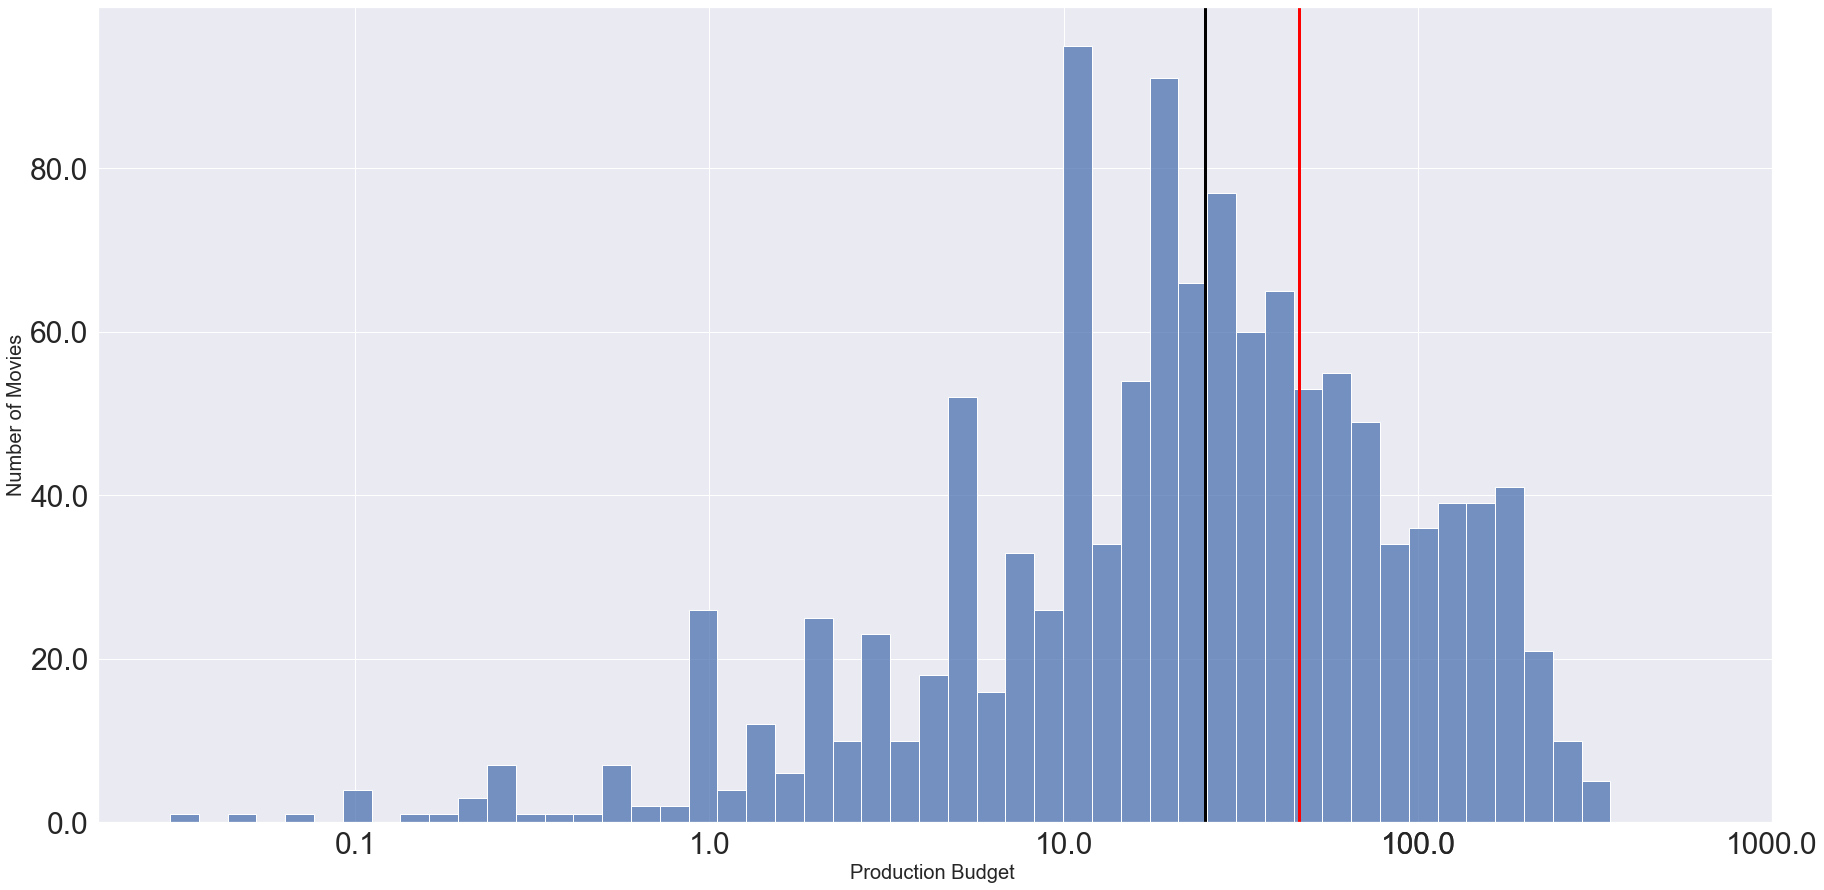

In [44]:
ax3 = sns.histplot(x=joined_df3['production_budget'], bins= 50, log_scale=True)

plt.axvline(x=joined_df3['production_budget'].mean(),
            color='red',linewidth=3, label = 'mean')
plt.axvline(x=joined_df3['production_budget'].median(),
            color='black', linewidth=3)

plt.xlabel("Production Budget ", size=20)
plt.ylabel("Number of Movies", size=20)

ax3.set_xticklabels(ax3.get_xticks(), size = 30)
ax3.set_yticklabels(ax3.get_yticks(), size = 30)

ax3.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax3.set_xticks([0.1, 1, 100, 10,100, 1000]);

C:\Users\milad\Documents\Flatiron\Anaconda\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-39-929e1de53a20>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(ax4.get_xticks(), size = 30)
<ipython-input-39-929e1de53a20>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(ax4.get_yticks(), size = 30);


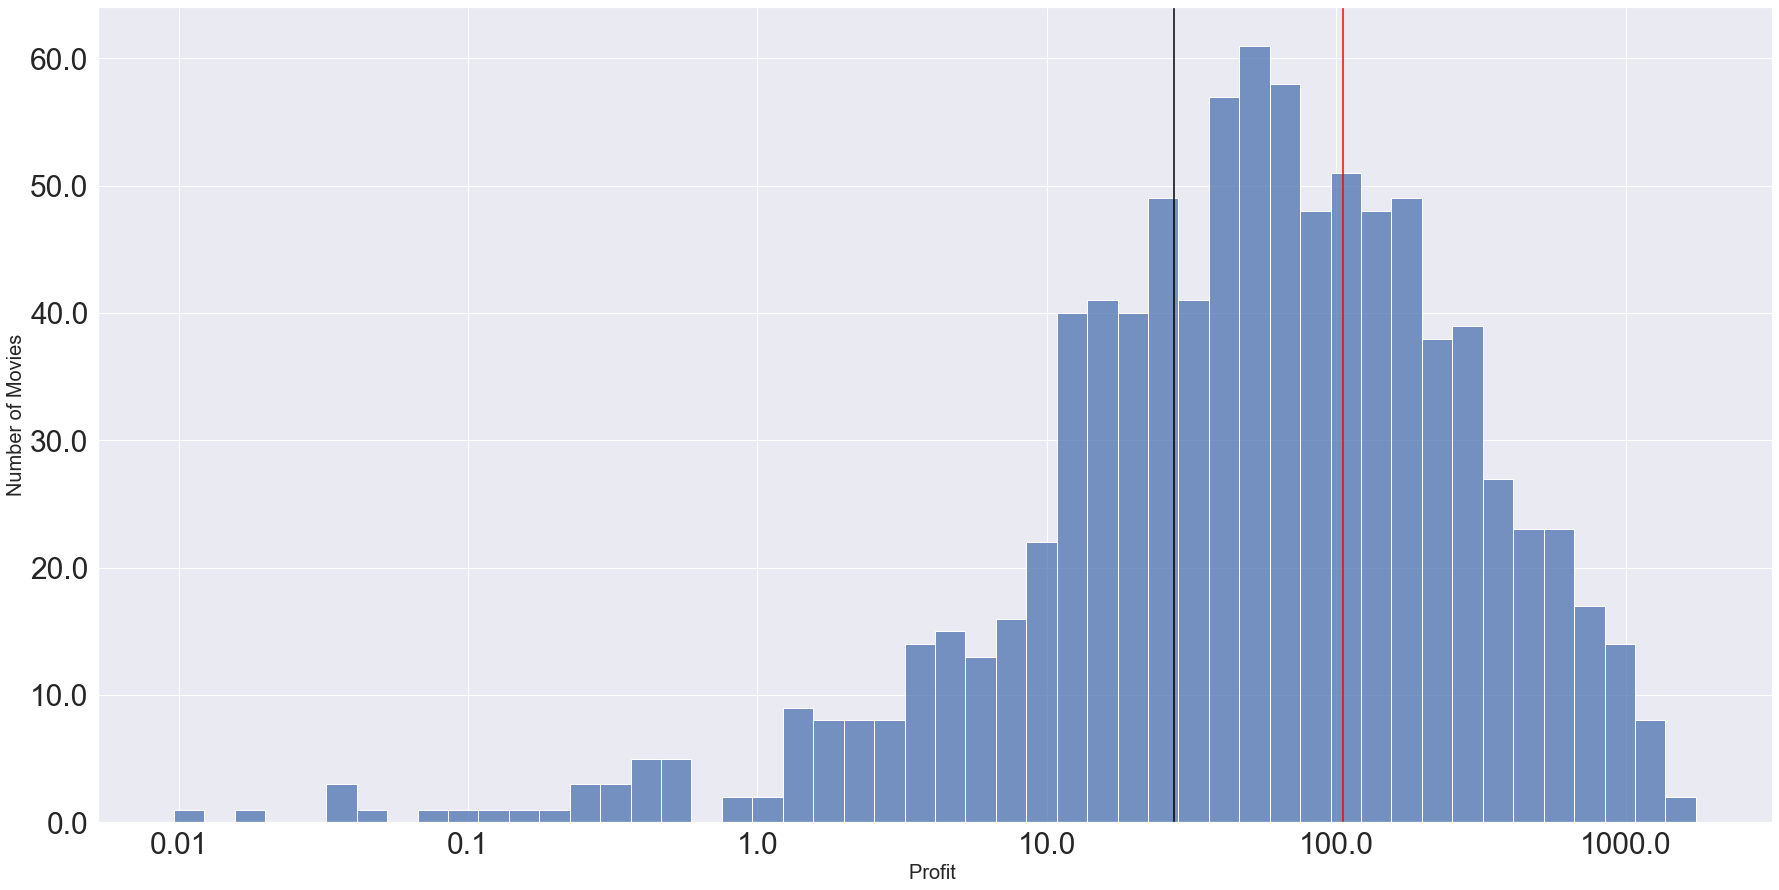

In [39]:
ax4 = sns.histplot(x=joined_df3['profit'], bins=50, log_scale=True)
plt.axvline(x=joined_df3['profit'].mean(),
            color='red')
plt.axvline(x=joined_df3['profit'].median(),
            color='black')

plt.xlabel("Profit ", size=20)
plt.ylabel("Number of Movies", size=20)

ax4.set_xticklabels(ax4.get_xticks(), size = 30)
ax4.set_yticklabels(ax4.get_yticks(), size = 30);

#ax4.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
#ax4.set_xticks([-100, -10, 0, 1, 10,100, 1000]);

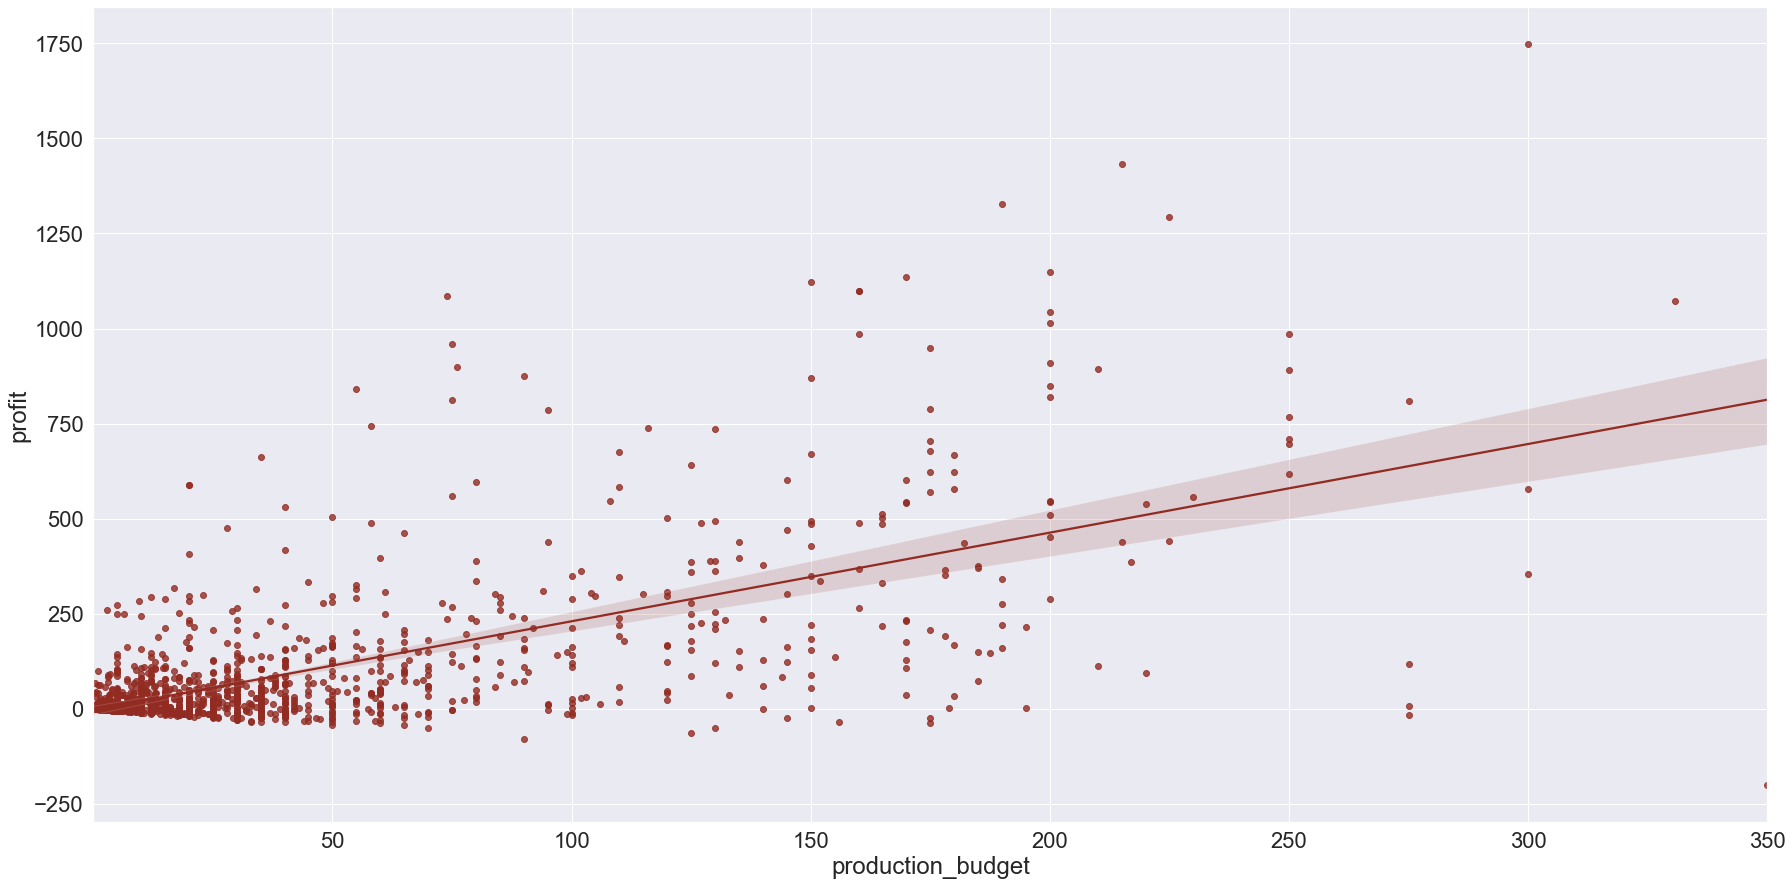

In [48]:
sns.regplot(x=joined_df3['production_budget'], y = joined_df3['profit'], color = "#922B21");

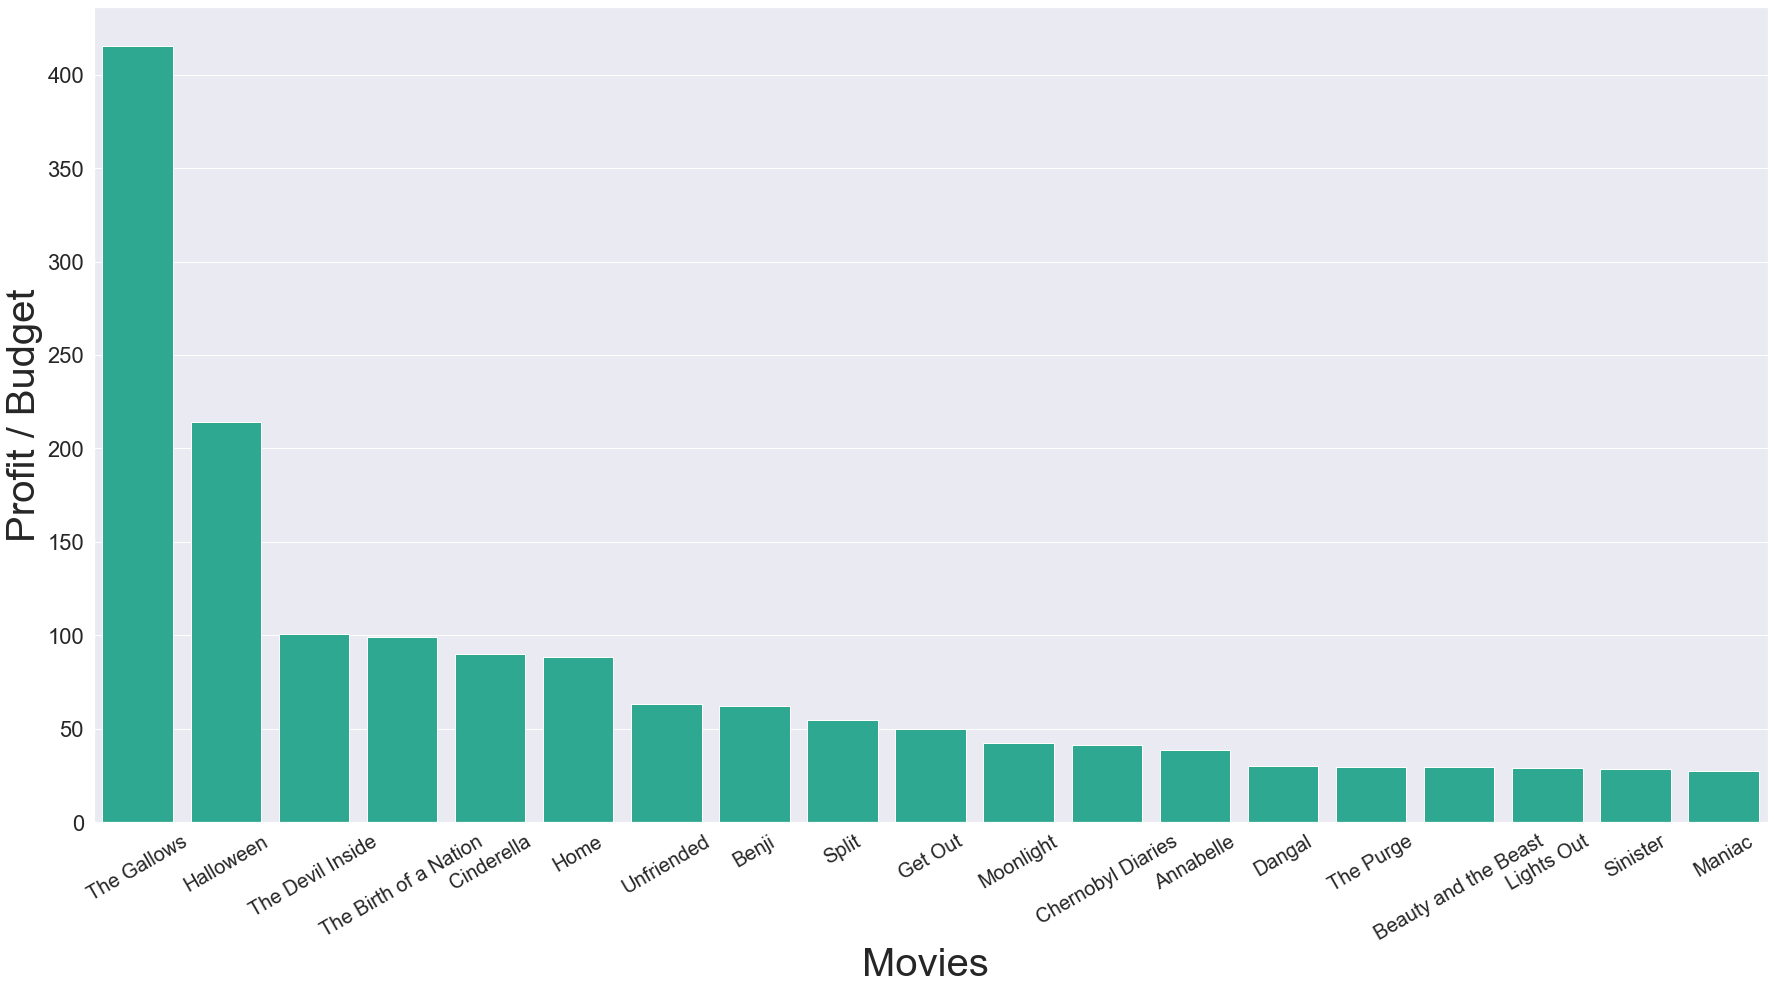

In [41]:
sns.set(rc={'figure.figsize':(30,15)})
sns.set(font_scale=2)
ax = sns.barplot(x=joined_df3['primary_title'][:20], y=joined_df3['profit over budget'][:20], color = "#1ABC9C", saturation=0.75)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, fontsize= 20)
plt.xlabel("Movies ", size=40)
plt.ylabel("Profit / Budget", size=40);


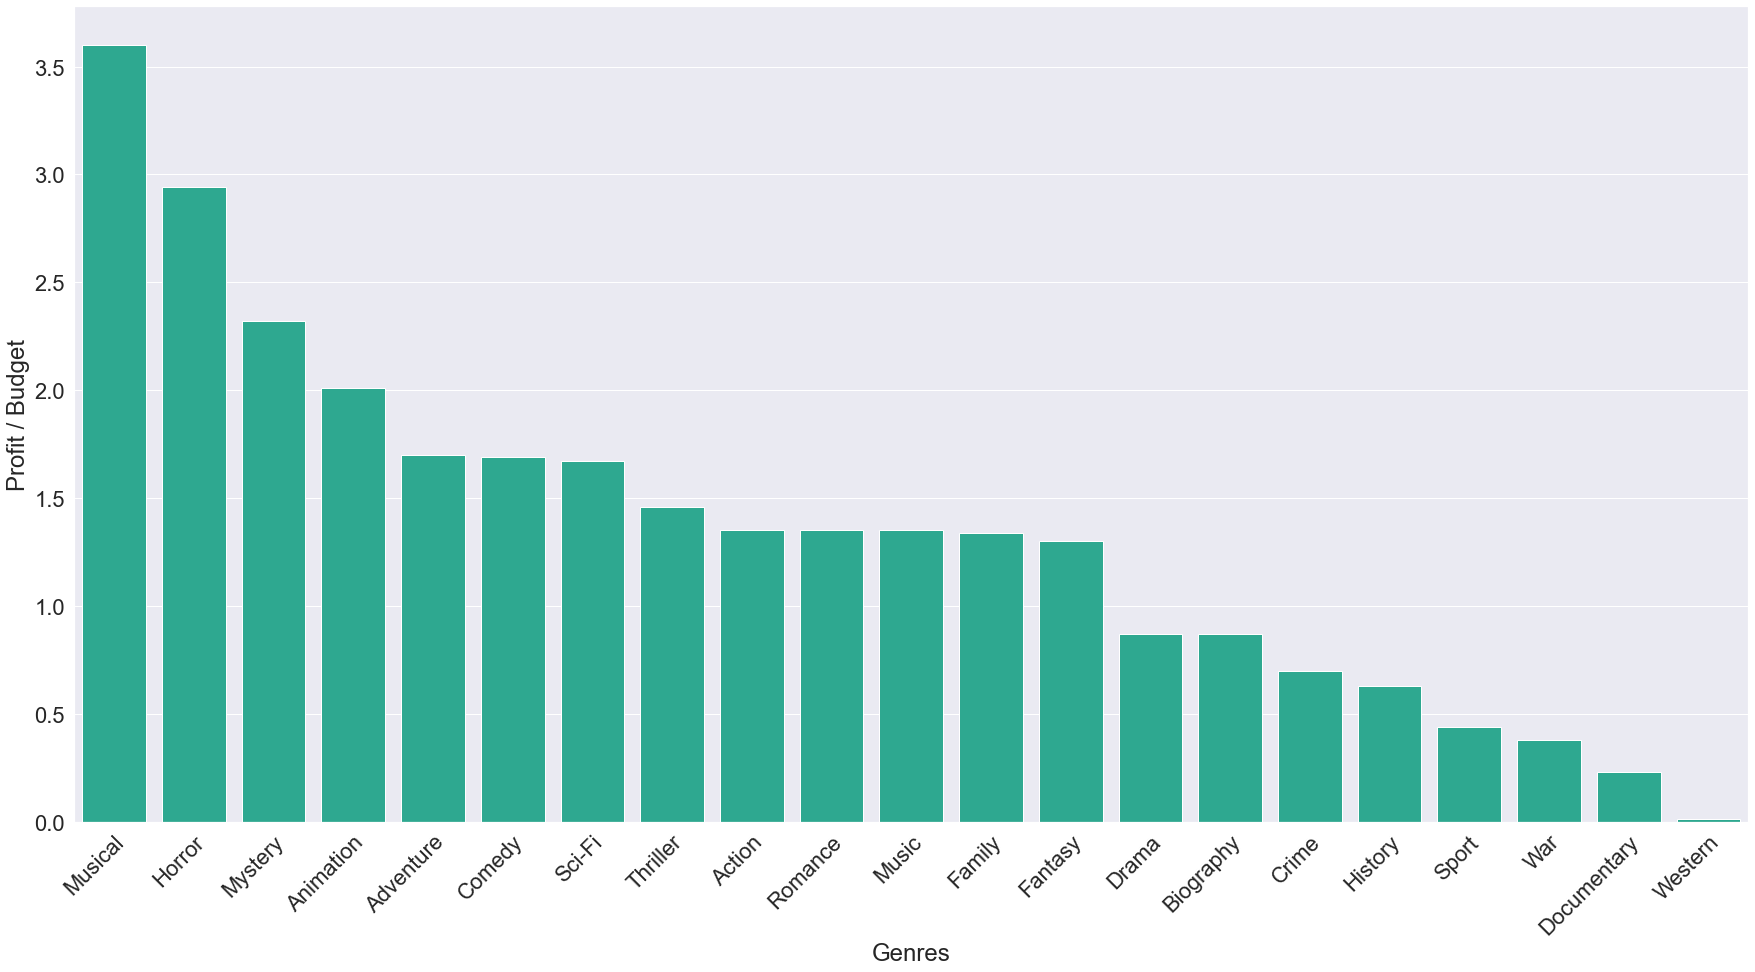

In [89]:
keyss = list(genres_.keys())
vals = [float(genres_[k]) for k in keyss]

sorted_df = pd.DataFrame({"Genres": keyss, "Profit / Budget": vals})

sns.set(font_scale=2)
ax2 = sns.barplot(x='Genres', y='Profit / Budget',data=sorted_df, order=sorted_df.sort_values('Profit / Budget',ascending=False).Genres, color="#1ABC9C", saturation=0.75);
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 45, ha="right", rotation_mode="anchor");


In [113]:
df7 = df6[df6['profit over budget'] < 20]


In [108]:
df6.describe()

,profit over budget
count,3188.000000
mean,3.670132
std,15.702203
min,-0.999862
25%,0.010177
50%,1.358951
75%,3.303028
max,415.564740


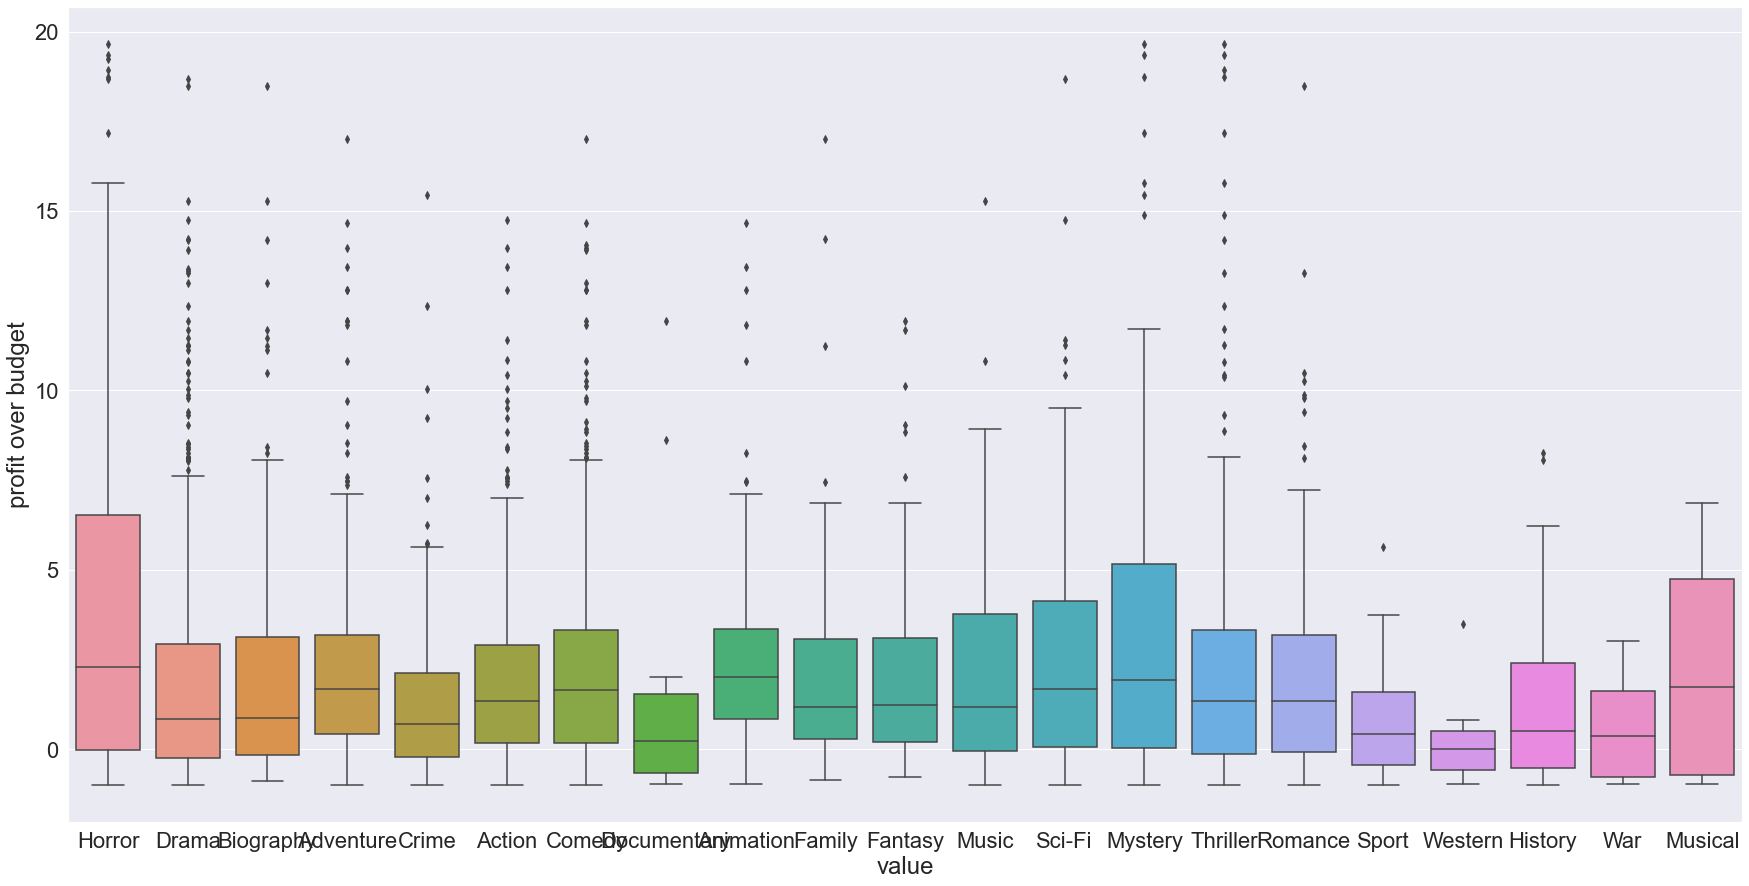

In [114]:
box_plot = sns.boxplot(x=df7['value'], y=df7['profit over budget'])
#box_plot.set_yscale("log")
#ticks = [-10, 0.1, 1, 10]
#box_plot.set_yticks(ticks)
#box_plot.set_yticklabels(ticks);
#_ = box_plot.set(xlabel="Class", ylabel="Survived")

In [94]:
df6.value.value_counts()

Drama          646
Comedy         385
Action         367
Adventure      308
Thriller       220
Crime          192
Horror         147
Romance        140
Biography      129
Sci-Fi         124
Mystery        113
Fantasy        101
Animation       85
Family          60
History         49
Music           42
Sport           33
War             17
Documentary     15
Western          8
Musical          7
Name: value, dtype: int64

In [116]:
joined_df3.genres.nunique()

205

In [126]:
joined_df3.groupby("genres")["profit over budget"].agg("count").reset_index().sort_values("profit over budget",ascending=False)

,genres,profit over budget
53,"Adventure,Animation,Comedy",57
11,"Action,Adventure,Sci-Fi",48
153,Drama,44
105,"Comedy,Drama",41
113,"Comedy,Drama,Romance",38
...,...,...
99,"Biography,Family,Sport",1
98,"Biography,Drama,Western",1
97,"Biography,Drama,War",1
93,"Biography,Drama,Musical",1


In [127]:
joined_df3.groupby("genres")["profit over budget"].agg("mean").reset_index().sort_values("profit over budget",ascending=False)

,genres,profit over budget
137,"Crime,Drama,Family",62.119120
155,"Drama,Family,Fantasy",47.260224
200,"Horror,Mystery,Thriller",30.659597
196,Horror,18.873086
192,"Family,Fantasy,Musical",18.145777
...,...,...
152,"Documentary,War",-0.981401
175,"Drama,Music,Thriller",-0.985568
166,"Drama,History,Sport",-0.994372
1,"Action,Adventure",-0.997384
